In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13, 6
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,month_plot
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import itertools
from IPython.display import display
import warnings 
warnings.filterwarnings("ignore")

# Problem 1 - Sparkling Wine Data Analysis

In [2]:
ds=pd.read_csv('C:/Users/dheepig/Desktop/Dheepika/Great Lakes/Session 7- Time Series Forecasting/Project/Datasets/Sparkling.csv')
ds.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

# Question 1. Read the data as an appropriate Time Series data and plot the data.

In [3]:
dup=ds.duplicated().sum()
print("There are total of {}".format(dup), "duplicate records in the dataset")

There are total of 0 duplicate records in the dataset


In [4]:
dups=ds.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [5]:
ds.drop_duplicates(subset=None,keep='first',inplace=True)

In [6]:
ds.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [7]:
ds.skew(axis=0,skipna=True)

Sparkling    1.817612
dtype: float64

In [8]:
ds.kurtosis(axis=0,skipna=True)

Sparkling    2.709292
dtype: float64

In [9]:
for column in ds.columns:
    if ds[column].dtype !='object':
        median=ds[column].median()
        ds[column]=ds[column].fillna(median)
ds.isnull().sum()  

YearMonth    0
Sparkling    0
dtype: int64

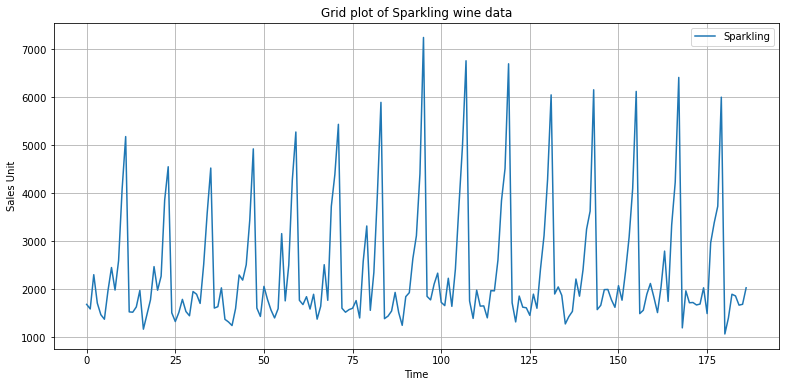

In [10]:
ds.plot();
plt.title("Grid plot of Sparkling wine data")
plt.xlabel("Time")
plt.ylabel("Sales Unit")
plt.grid()

In [11]:
date = pd.date_range(start='01/01/1980', end='08/01/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [12]:
ds['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])

In [13]:
ds.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [14]:
ds['Time_Stamp']=pd.to_datetime(ds['Time_Stamp'])
ds= ds.set_index('Time_Stamp')
ds.drop(['YearMonth'],axis=1, inplace = True)
ds.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

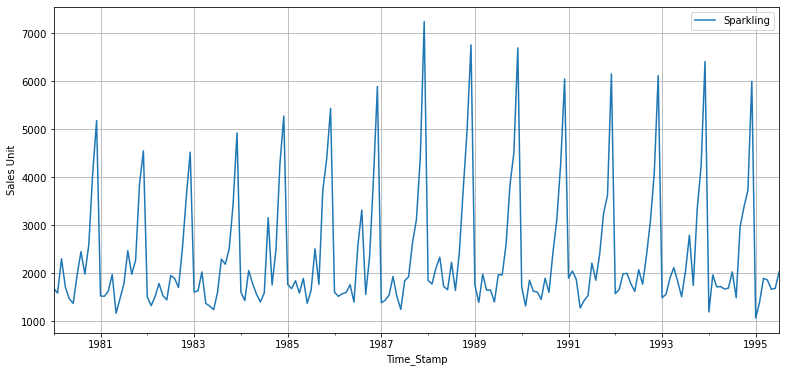

In [15]:
ds.plot();
plt.ylabel("Sales Unit")
plt.grid()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [16]:
ds.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [17]:
ds.describe(include='all')

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [18]:
row, col = ds.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 187 rows and 1 columns in the dataset


In [19]:
ds.isnull().any()

Sparkling    False
dtype: bool

In [20]:
ds.isnull().sum()

Sparkling    0
dtype: int64

In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


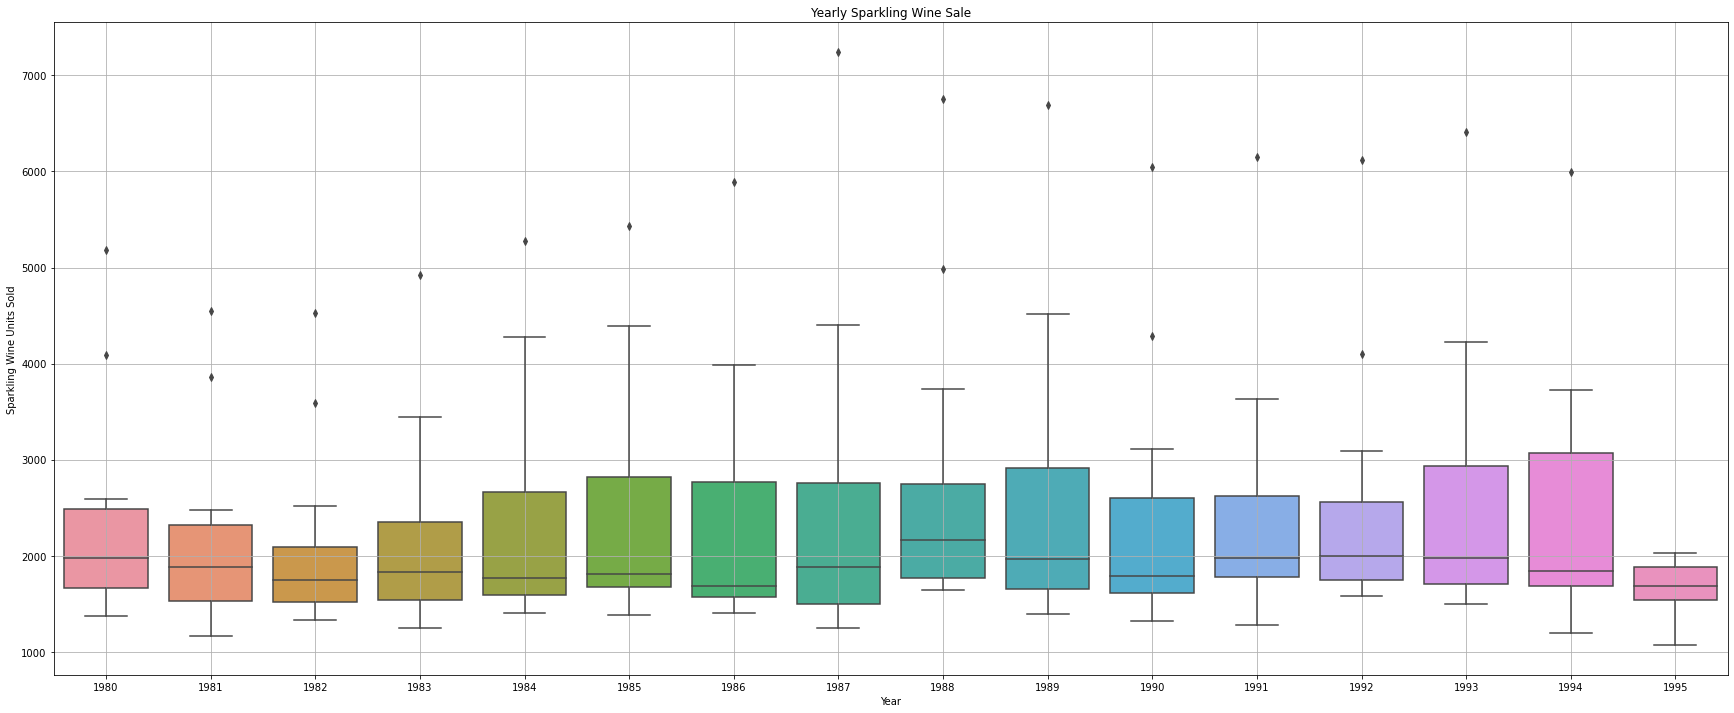

In [22]:
_, ax = plt.subplots(figsize=(30,12)) #yearly plot
sns.boxplot(x = ds.index.year,y = ds.values[:,0],ax=ax)
plt.title('Yearly Sparkling Wine Sale');
plt.xlabel('Year');
plt.ylabel('Sparkling Wine Units Sold');
plt.grid();

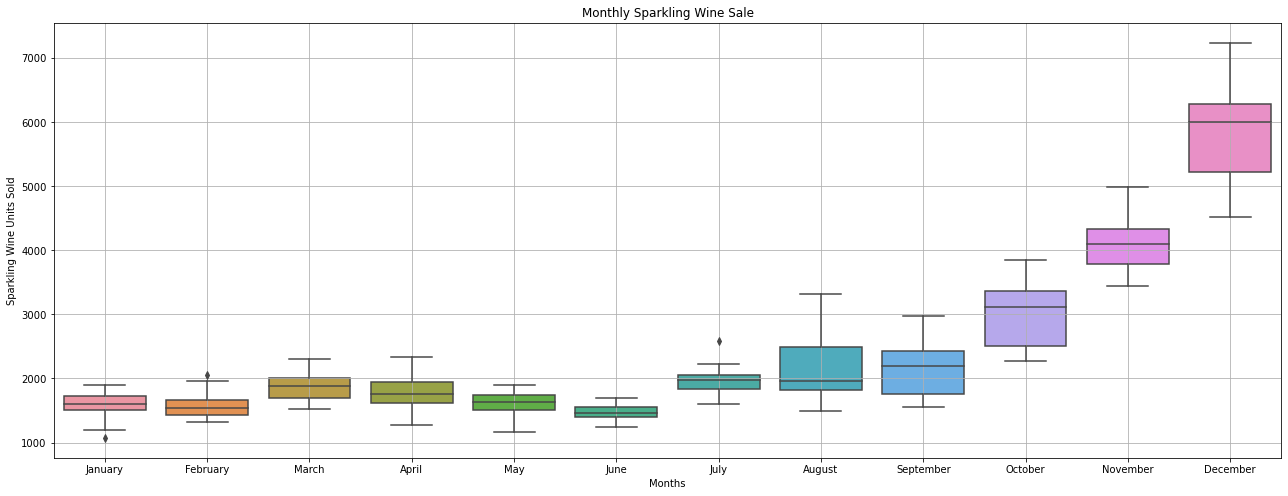

In [23]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = ds.index.month_name(),y = ds.values[:,0],ax=ax)
plt.title('Monthly Sparkling Wine Sale');
plt.xlabel('Months')
plt.ylabel('Sparkling Wine Units Sold');
plt.grid();

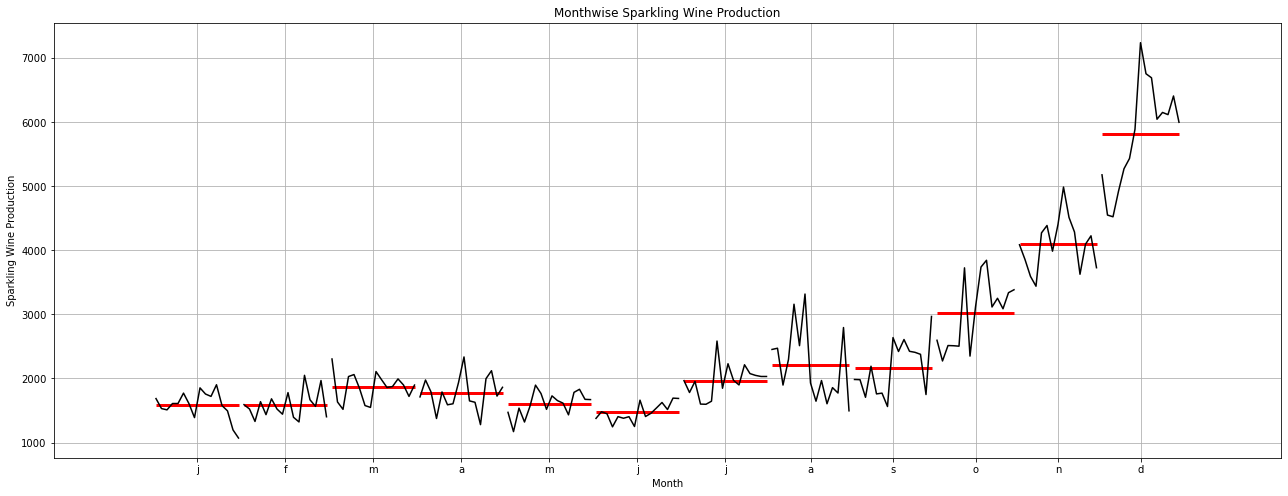

In [24]:
fig, ax = plt.subplots(figsize=(22,8))
plt.title('Monthwise Sparkling Wine Production')
plt.xlabel('Month')
month_plot(ds,ylabel='Sparkling Wine Production',ax=ax)
plt.grid();

In [25]:
monthly_sales_across_years = pd.pivot_table(ds, values = 'Sparkling', columns = ds.index.month_name(), index = ds.index.year)
monthly_sales_across_years

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

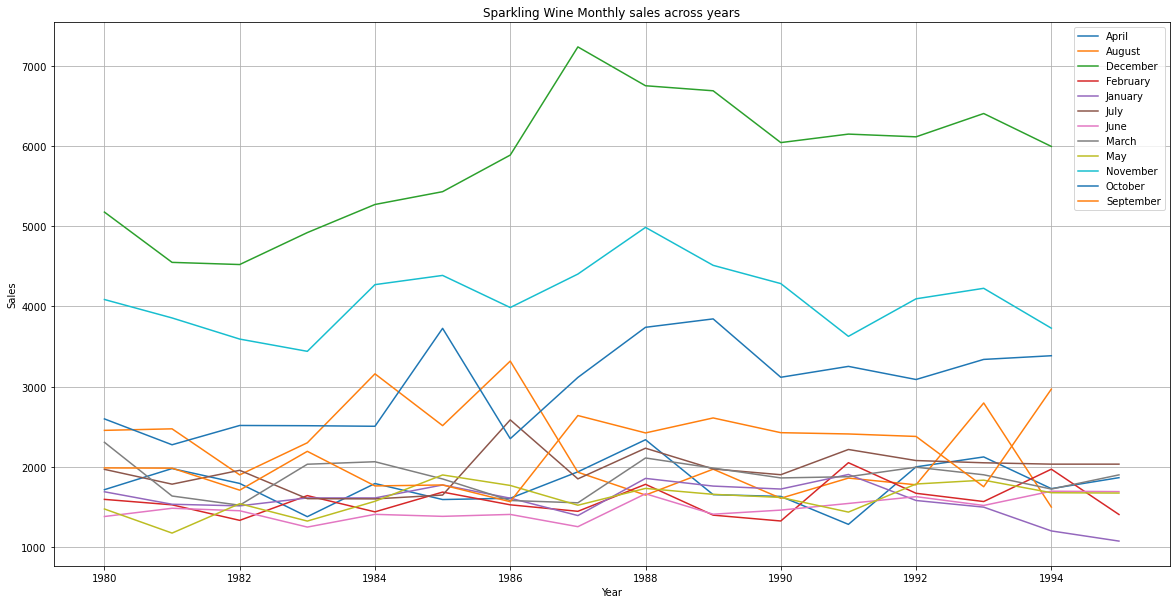

In [26]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.title('Sparkling Wine Monthly sales across years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best');

def detect_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5 * IQR)
    upper_range=Q3+(1.5 * IQR)
    return lower_range,upper_range

In [27]:
ds_yearly_sum = ds.resample('A').sum()
ds_yearly_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

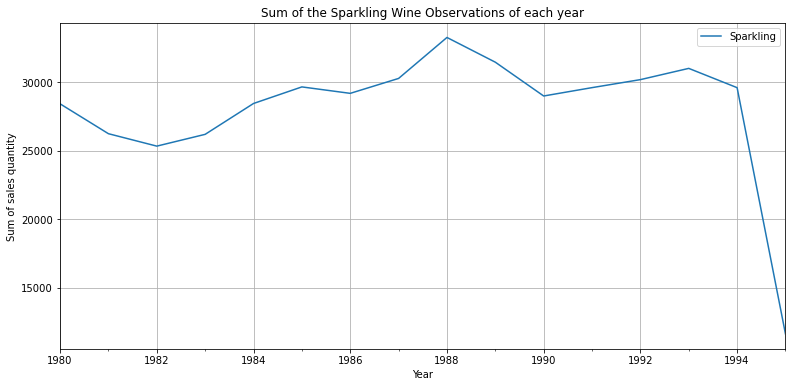

In [28]:
ds_yearly_sum.plot();
plt.grid()
plt.title('Sum of the Sparkling Wine Observations of each year')
plt.ylabel('Sum of sales quantity')
plt.xlabel('Year');

In [29]:
ds_yearly_mean = ds.resample('Y').mean()
ds_yearly_mean.head()

Sparkling
Time_Stamp             
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

Text(0, 0.5, 'Mean of Sales')

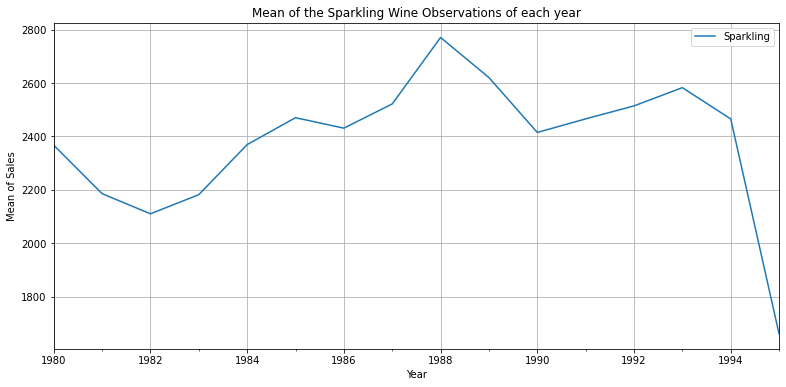

In [30]:
ds_yearly_mean.plot();
plt.grid()
plt.title('Mean of the Sparkling Wine Observations of each year');
plt.xlabel('Year')
plt.ylabel('Mean of Sales')

In [31]:
ds_quarterly_sum = ds.resample('Q').sum()
ds_quarterly_sum.head()

Sparkling
Time_Stamp           
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

Text(0, 0.5, 'Sum of Sales Quantity')

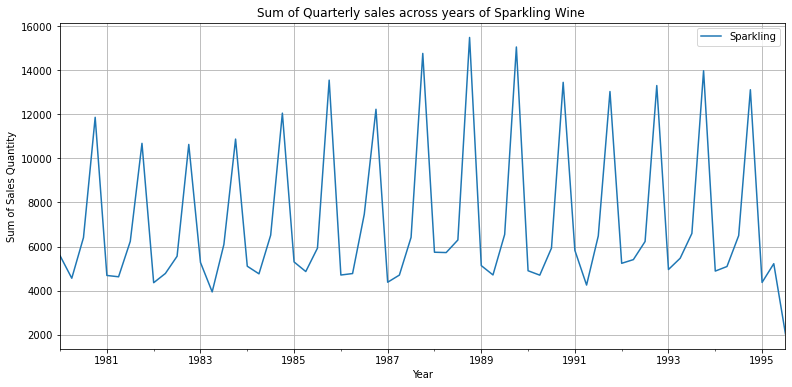

In [32]:
ds_quarterly_sum.plot();
plt.grid()
plt.title('Sum of Quarterly sales across years of Sparkling Wine ');
plt.xlabel('Year')
plt.ylabel('Sum of Sales Quantity')

In [33]:
ds_quarterly_mean = ds.resample('Q').mean()
ds_quarterly_mean.head()

Sparkling
Time_Stamp             
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

Text(0, 0.5, 'Mean of Sales Quantity')

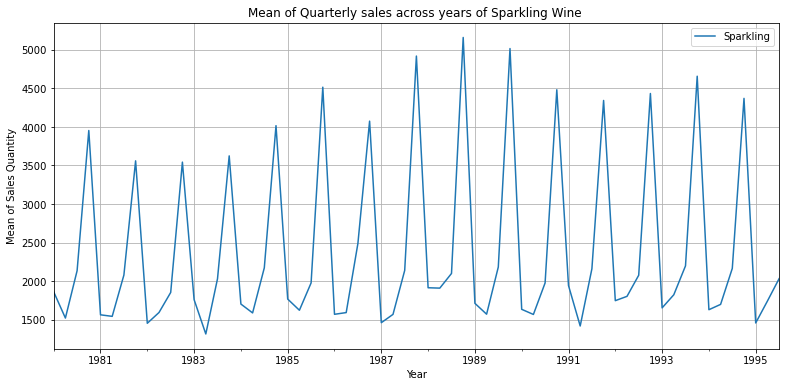

In [34]:
ds_quarterly_mean.plot();
plt.grid()
plt.title('Mean of Quarterly sales across years of Sparkling Wine ');
plt.xlabel('Year')
plt.ylabel('Mean of Sales Quantity')

In [35]:
ds_daily_sum = ds.resample('D').sum()
ds_daily_sum

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0
...               ...
1995-07-27          0
1995-07-28          0
1995-07-29          0
1995-07-30          0
1995-07-31       2031

[5661 rows x 1 columns]

Text(0, 0.5, 'Sum of Sales Quantity')

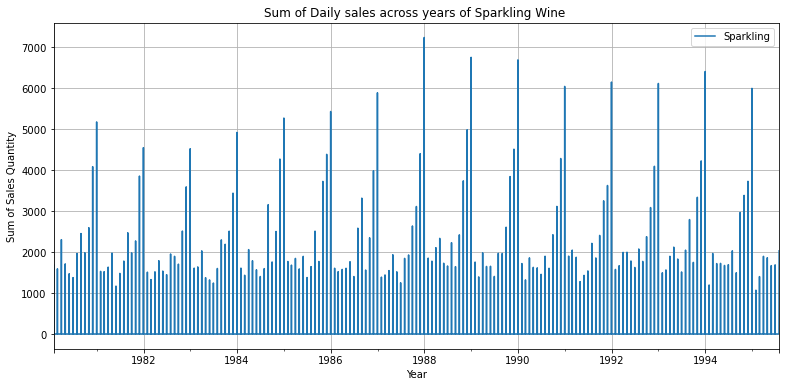

In [36]:
ds_daily_sum.plot()
plt.grid()
plt.title('Sum of Daily sales across years of Sparkling Wine ');
plt.xlabel('Year')
plt.ylabel('Sum of Sales Quantity')

In [37]:
ds_decade_sum = ds.resample('10Y').sum()
ds_decade_sum

Sparkling
Time_Stamp           
1980-12-31      28406
1990-12-31     288893
2000-12-31     131953

Text(0, 0.5, 'Sum of Decade Quantity')

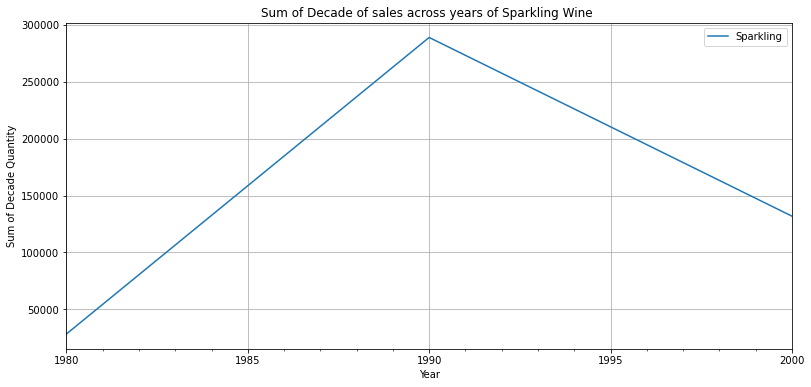

In [38]:
ds_decade_sum.plot();
plt.grid()
plt.title('Sum of Decade of sales across years of Sparkling Wine ');
plt.xlabel('Year')
plt.ylabel('Sum of Decade Quantity')

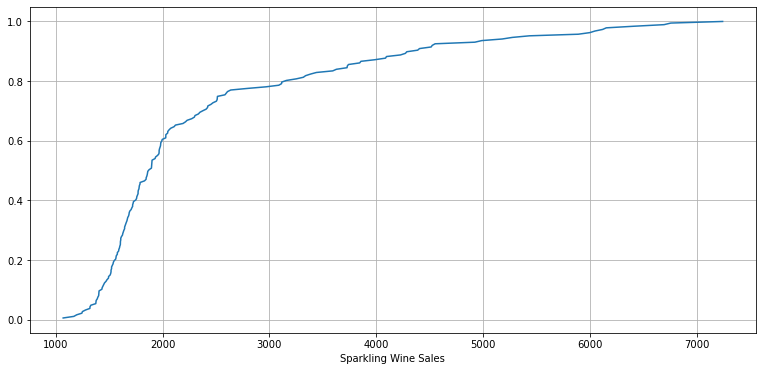

In [39]:
cds = ECDF(ds['Sparkling'])
plt.plot(cds.x, cds.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling Wine Sales');

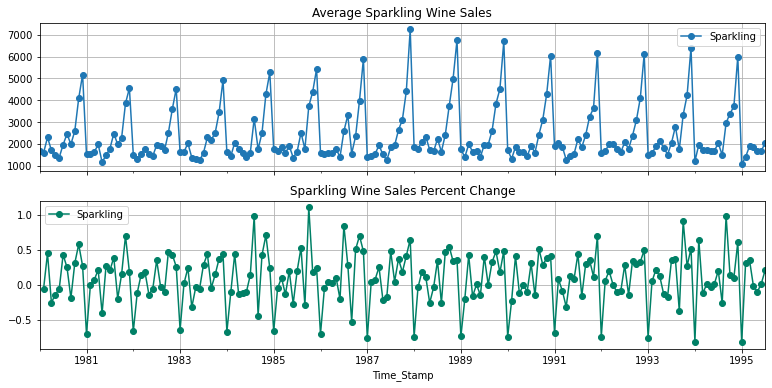

In [40]:
average = ds.groupby(ds.index)["Sparkling"].mean()
pct_change = ds.groupby(ds.index)["Sparkling"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(13,6))
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Wine Sales Percent Change",grid=True)

In [41]:
ds['1994']

Sparkling
Time_Stamp           
1994-01-31       1197
1994-02-28       1968
1994-03-31       1720
1994-04-30       1725
1994-05-31       1674
1994-06-30       1693
1994-07-31       2031
1994-08-31       1495
1994-09-30       2968
1994-10-31       3385
1994-11-30       3729
1994-12-31       5999

In [42]:
ds.interpolate(methods='spline',order=3,inplace=True)

In [43]:
ds['1994']

Sparkling
Time_Stamp           
1994-01-31       1197
1994-02-28       1968
1994-03-31       1720
1994-04-30       1725
1994-05-31       1674
1994-06-30       1693
1994-07-31       2031
1994-08-31       1495
1994-09-30       2968
1994-10-31       3385
1994-11-30       3729
1994-12-31       5999

In [44]:
ds.isna().sum()

Sparkling    0
dtype: int64

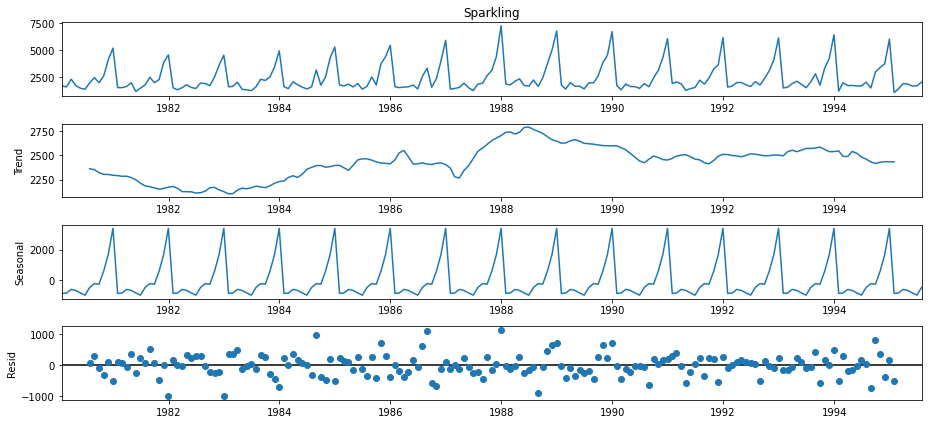

In [45]:
decomposition = seasonal_decompose(ds['Sparkling'],model='additive')
decomposition.plot();

In [46]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [47]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2431.502265
1980-08-31    2667.332821
1980-09-30    2238.677265
1980-10-31    1996.230043
1980-11-30    2411.932821
1980-12-31    1792.016154
dtype: float64

Text(0, 0.5, 'Sales')

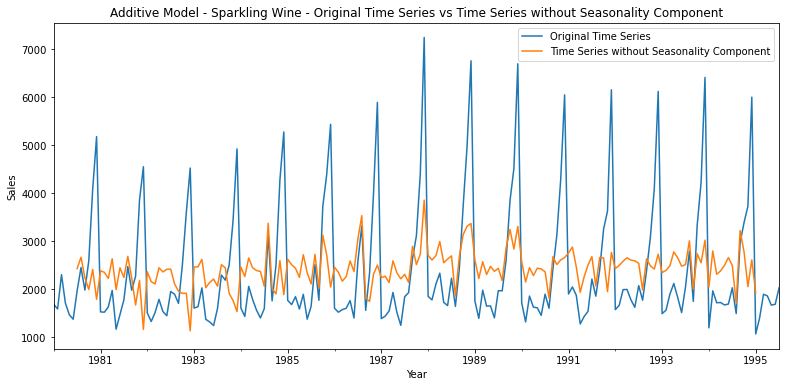

In [48]:
ds.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);
plt.title('Additive Model - Sparkling Wine - Original Time Series vs Time Series without Seasonality Component')
plt.xlabel('Year')
plt.ylabel('Sales')

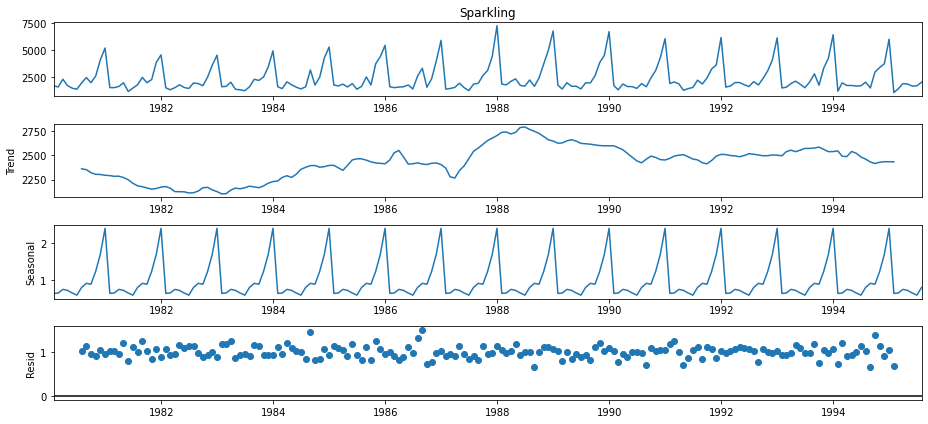

In [49]:
decomposition = seasonal_decompose(ds['Sparkling'],model='multiplicative')
decomposition.plot();

In [50]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [51]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2361.695896
1980-08-31    2352.468741
1980-09-30    2321.497620
1980-10-31    2304.490847
1980-11-30    2303.092089
1980-12-31    2294.738436
dtype: float64

Text(0, 0.5, 'Sales')

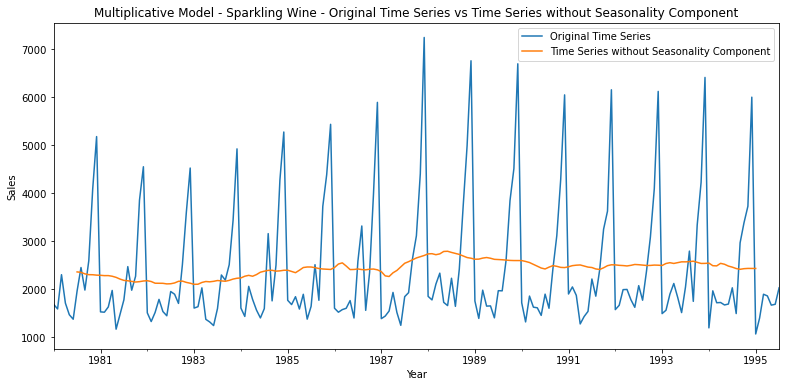

In [52]:
ds.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);
plt.title('Multiplicative Model - Sparkling Wine - Original Time Series vs Time Series without Seasonality Component')
plt.xlabel('Year')
plt.ylabel('Sales')

# 3. Split the data into training and test. The test data should start in 1991.

### Splitting data into training and test set

In [53]:
train=ds[ds.index.year< 1991]
test=ds[ds.index.year>=1991]

In [54]:
print('Shape of Training Data is',train.shape)

Shape of Training Data is (132, 1)


In [55]:
print('Shape of Testing Data is',test.shape)

Shape of Testing Data is (55, 1)


In [56]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



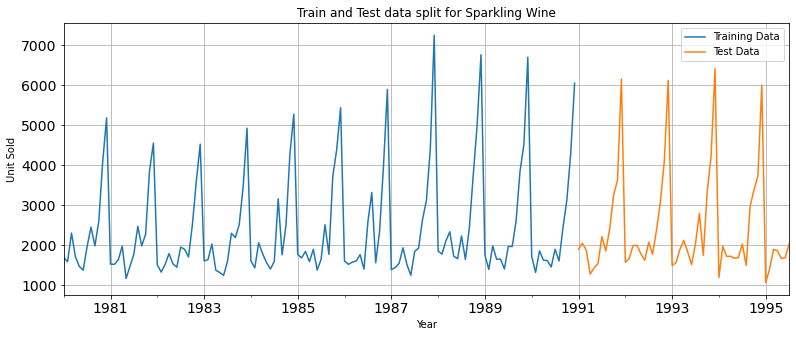

In [57]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.title('Train and Test data split for Sparkling Wine')
plt.xlabel('Year')
plt.ylabel('Unit Sold')
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [58]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


### Model 1 : Linear Regression

In [59]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [60]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



In [61]:
lr = LinearRegression()

In [62]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

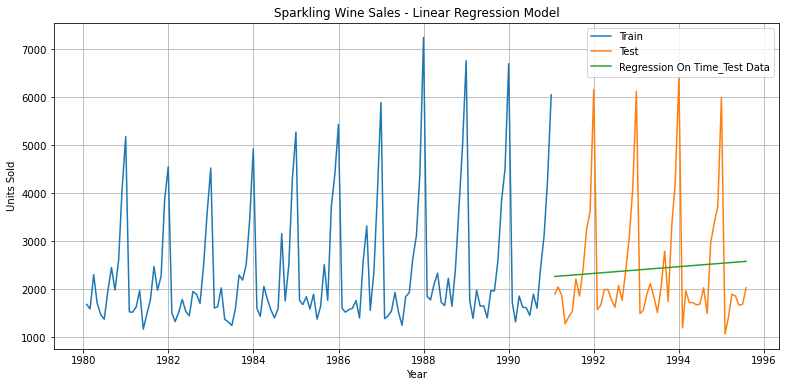

In [63]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(13,6))    
plt.title('Sparkling Wine Sales - Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

### Test Data - RMSE

In [64]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data, RMSE is %3.3f"%(rmse_model1_test))

For RegressionOnTime forecast on the Test Data, RMSE is 1275.867


In [65]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
round(resultsDf,2)

Test RMSE
RegressionOnTime    1275.87

### Model 2 : Naïve Approach

In [66]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [67]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

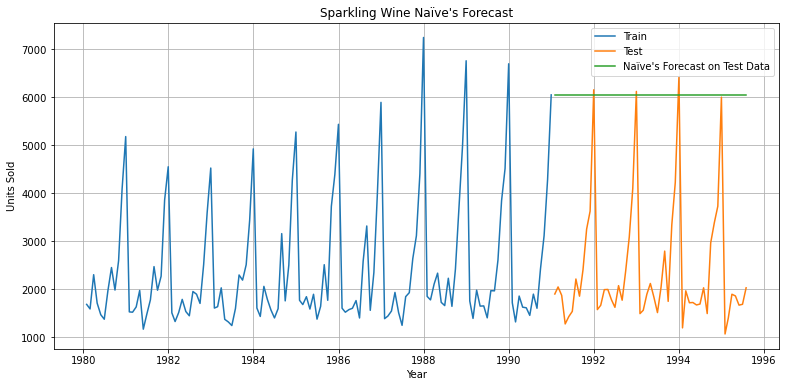

In [68]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.title("Sparkling Wine Sales - Naïve's Approach Model")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.plot(NaiveModel_test['naive'], label="Naïve's Forecast on Test Data")
plt.legend(loc='best')
plt.title("Sparkling Wine Naïve's Forecast")
plt.grid();

### Test Data - RMSE

In [69]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naïve's forecast on the Test Data, RMSE is %3.3f" %(rmse_model2_test))

For Naïve's forecast on the Test Data, RMSE is 3864.279


In [70]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=["Naïve's Model"])
resultsDf = pd.concat([resultsDf, resultsDf_2])
round(resultsDf,2)

Test RMSE
RegressionOnTime    1275.87
Naïve's Model       3864.28

### Model 3: Simple Average

In [71]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [72]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

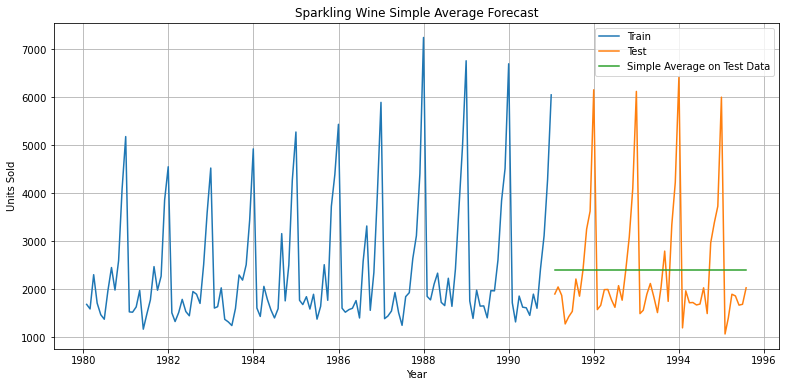

In [73]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.title("Sparkling Wine Sales - Simple Average Model")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Sparkling Wine Simple Average Forecast")
plt.grid();

### Test Data - RMSE

In [74]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data, RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data, RMSE is 1275.082


In [75]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
round(resultsDf,2)

Test RMSE
RegressionOnTime      1275.87
Naïve's Model         3864.28
SimpleAverageModel    1275.08

### Model 4: Moving Average

In [76]:
MovingAverage = ds.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [77]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

### Plotting on the whole data

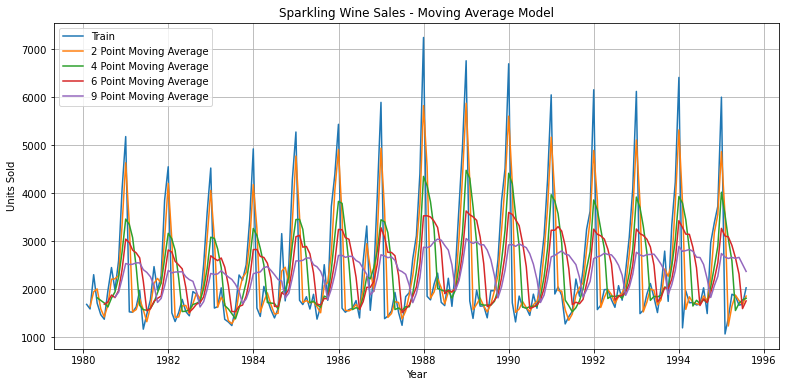

In [78]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title("Sparkling Wine Sales - Moving Average Model")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(loc = 'best')
plt.grid();

### Creating train and test set

In [79]:
trailing_MovingAverage_train=MovingAverage[ds.index.year< 1991]
trailing_MovingAverage_test=MovingAverage[ds.index.year>=1991]

### Plotting on both the Training and Test data

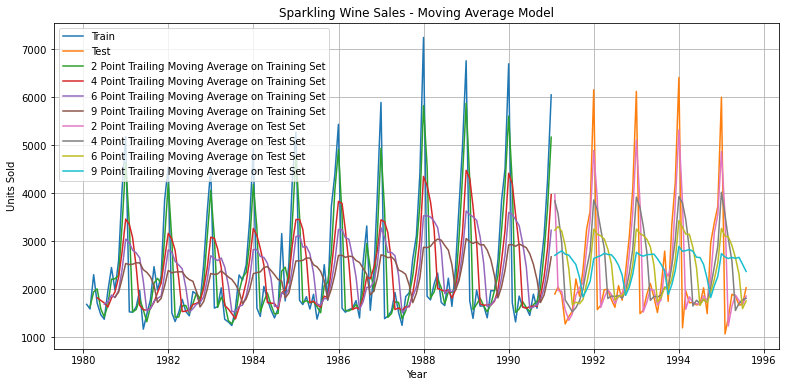

In [80]:
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title("Sparkling Wine Sales - Moving Average Model")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.grid();

In [81]:
# Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,RMSE is %3.3f" %(rmse_model4_test2))
# Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,RMSE is %3.3f" %(rmse_model4_test4))
# Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,RMSE is %3.3f" %(rmse_model4_test6))
## Test Data - RMSE --> 9 point Trailing MA
rmse_model4_test9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,RMSE is %3.3f " %(rmse_model4_test9))

For 2 point Moving Average Model forecast on the Training Data,RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,RMSE is 1346.278 


In [82]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test2,rmse_model4_test4,rmse_model4_test6,rmse_model4_test9]}
,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage','6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
round(resultsDf,2)

Test RMSE
RegressionOnTime               1275.87
Naïve's Model                  3864.28
SimpleAverageModel             1275.08
2pointTrailingMovingAverage     813.40
4pointTrailingMovingAverage    1156.59
6pointTrailingMovingAverage    1283.93
9pointTrailingMovingAverage    1346.28

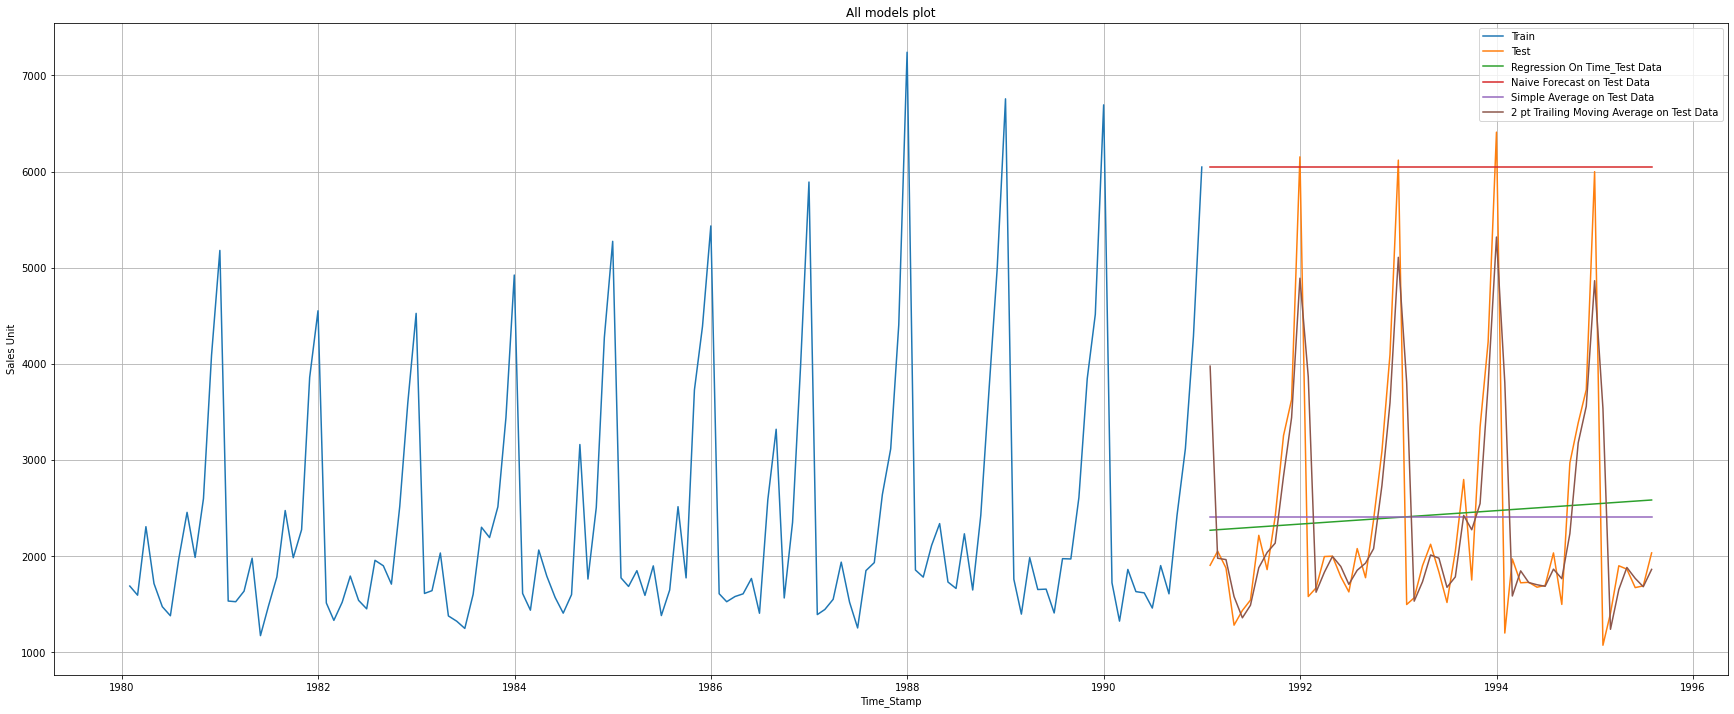

In [83]:
plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'],label='Train')
plt.plot(test['Sparkling'],label='Test')
plt.plot(LinearRegression_test['RegOnTime'],label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'],label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'],label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 pt Trailing Moving Average on Test Data')
plt.legend(loc='best')
plt.title('All models plot')
plt.ylabel("Sales Unit")
plt.xlabel("Time_Stamp")
plt.grid();

### Model 5: Simple Exponential Smoothing

In [84]:
SES_train = train.copy()
SES_test = test.copy()

In [85]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [86]:
model_SES_autofit = model_SES.fit(optimized=True)

In [87]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.932624
1991-02-28       2049  2724.932624
1991-03-31       1874  2724.932624
1991-04-30       1279  2724.932624
1991-05-31       1432  2724.932624

### Plotting on both the Training and Test data

Text(0, 0.5, 'Units Sold')

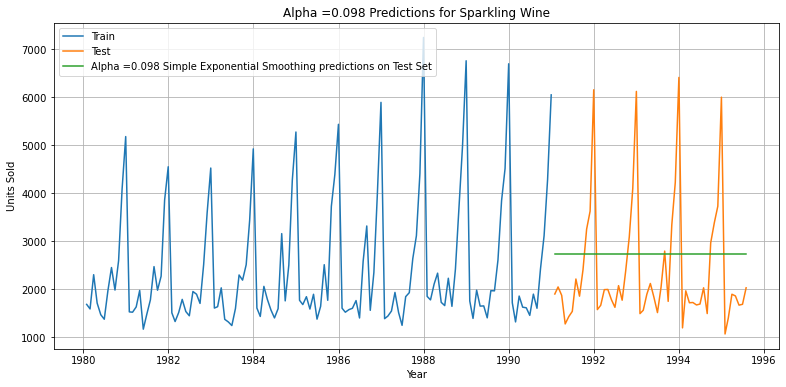

In [89]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions for Sparkling Wine');
plt.xlabel('Year')
plt.ylabel('Units Sold')

### Test Data

In [90]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha = 0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha = 0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [91]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
round(resultsDf,2)

Test RMSE
RegressionOnTime                          1275.87
Naïve's Model                             3864.28
SimpleAverageModel                        1275.08
2pointTrailingMovingAverage                813.40
4pointTrailingMovingAverage               1156.59
6pointTrailingMovingAverage               1283.93
9pointTrailingMovingAverage               1346.28
Alpha=0.098,SimpleExponentialSmoothing    1316.04

### First we will define an empty dataframe to store our values from the loop

In [92]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
round(resultsDf_6,2)

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [93]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i,'Test RMSE':rmse_model5_test_i},ignore_index=True)

In [94]:
round(resultsDf_6,2).sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.3     1359.51    1935.51
1           0.4     1352.59    2311.92
2           0.5     1344.00    2666.35
3           0.6     1338.81    2979.20
4           0.7     1338.84    3249.94
5           0.8     1344.46    3483.80
6           0.9     1355.72    3686.79

### Plotting on both the Training and Test data

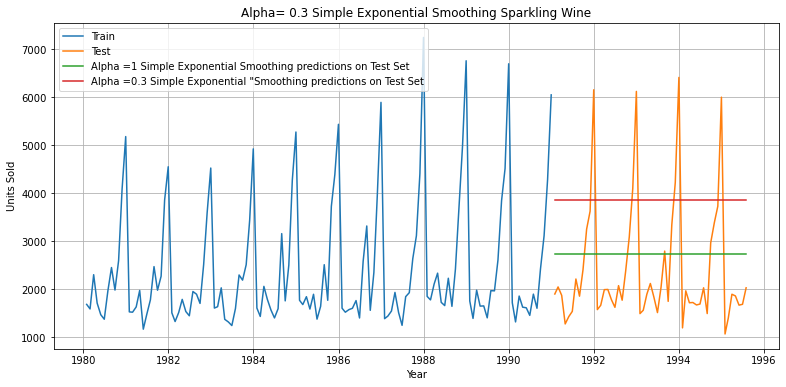

In [95]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential "Smoothing predictions on Test Set')
plt.title("Alpha= 0.3 Simple Exponential Smoothing Sparkling Wine")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(loc='best')
plt.grid();

In [96]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]},index=['Alpha=0.3,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
round(resultsDf,2)

Test RMSE
RegressionOnTime                          1275.87
Naïve's Model                             3864.28
SimpleAverageModel                        1275.08
2pointTrailingMovingAverage                813.40
4pointTrailingMovingAverage               1156.59
6pointTrailingMovingAverage               1283.93
9pointTrailingMovingAverage               1346.28
Alpha=0.098,SimpleExponentialSmoothing    1316.04
Alpha=0.3,SimpleExponentialSmoothing      1935.51

### Model 6: Double Exponential Smoothing - Holt's Model

In [97]:
DES_train = train.copy()
DES_test = test.copy()

In [98]:
model_DES = Holt(DES_train['Sparkling'])

### First we will define an empty dataframe to store our values from the loop

In [99]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
round(resultsDf_7,2)

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [100]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [101]:
round(resultsDf_7,2)

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.3          0.1     1431.17    5908.19
1            0.3          0.2     1507.42   11519.51
2            0.3          0.3     1592.29   18259.11
3            0.3          0.4     1682.57   26069.84
4            0.3          0.5     1771.71   34401.51
..           ...          ...         ...        ...
75           1.0          0.6     1753.40   49327.09
76           1.0          0.7     1825.19   52655.77
77           1.0          0.8     1902.01   55442.27
78           1.0          0.9     1985.37   57823.18
79           1.0          1.0     2077.67   59877.08

[80 rows x 4 columns]

In [102]:
round(resultsDf_7,2).sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.3          0.1     1431.17    5908.19
10           0.4          0.1     1424.27    8039.10
20           0.5          0.1     1411.15    9788.11
30           0.6          0.1     1401.62   11169.19
1            0.3          0.2     1507.42   11519.51

### Plotting on both the Training and Test data

In [103]:
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict', 0.3, 0.1], label='Alpha=0.3,Beta=0.1,Double ExponentialSmoothing predictions on Test Set')
plt.title("Alpha= 0.3, Beta= 0.1 Double Exponential Smoothing Sparkling Wine")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(loc='best')
plt.grid();

In [104]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]},index=['Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
round(resultsDf,2)

Test RMSE
RegressionOnTime                                 1275.87
Naïve's Model                                    3864.28
SimpleAverageModel                               1275.08
2pointTrailingMovingAverage                       813.40
4pointTrailingMovingAverage                      1156.59
6pointTrailingMovingAverage                      1283.93
9pointTrailingMovingAverage                      1346.28
Alpha=0.098,SimpleExponentialSmoothing           1316.04
Alpha=0.3,SimpleExponentialSmoothing             1935.51
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing    5908.19

### Model 7: Triple Exponential Smoothing - Holt Winter's Model

In [105]:
TES_train = train.copy()
TES_test = test.copy()

In [106]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [107]:
model_TES_autofit = model_TES.fit()

In [108]:
model_TES_autofit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

### Prediction on the test data

In [109]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1577.224489
1991-02-28       2049   1333.677558
1991-03-31       1874   1745.945679
1991-04-30       1279   1630.411925
1991-05-31       1432   1523.289070

### Plotting on both the Training and Test using autofit

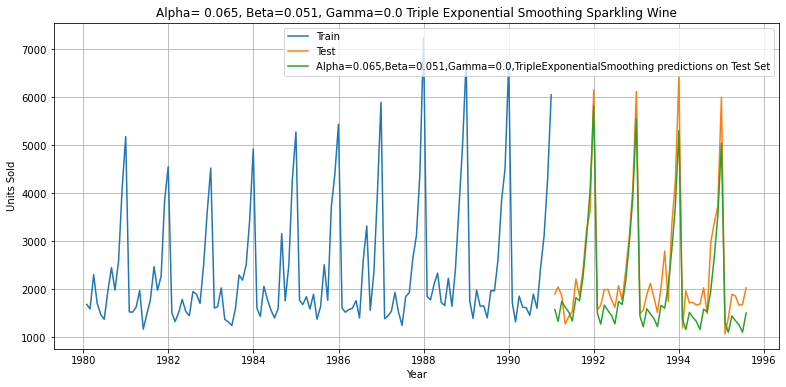

In [110]:
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.065,Beta=0.051,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')
plt.title("Alpha= 0.065, Beta=0.051, Gamma=0.0 Triple Exponential Smoothing Sparkling Wine")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(loc='best')
plt.grid();

In [111]:
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')
plt.title("Alpha= 0.106, Beta=0.048, Gamma=0.0 Triple Exponential Smoothing Sparkling Wine")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(loc='best')
plt.grid();

### Test Data

In [112]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.106,Beta=0.048,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.106,Beta=0.048,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 469.768


In [113]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
round(resultsDf,2)

Test RMSE
RegressionOnTime                                      1275.87
Naïve's Model                                         3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.098,SimpleExponentialSmoothing                1316.04
Alpha=0.3,SimpleExponentialSmoothing                  1935.51
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing         5908.19
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...     469.77

### First we will define an empty dataframe to store our values from the loop

In [114]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [115]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}, ignore_index=True)

In [116]:
resultsDf_8_2=resultsDf_8_2.sort_values(by=['Test RMSE']).head()
round(resultsDf_8_2,2)

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.3          0.3           0.3      404.51     392.79
8             0.3          0.4           0.3      424.83     410.85
65            0.4          0.3           0.4      435.55     421.41
296           0.7          0.8           0.3      700.32     518.19
130           0.5          0.3           0.5      498.24     542.18

### Plotting on both the Training and Test data using brute force alpha,beta and gamma determination

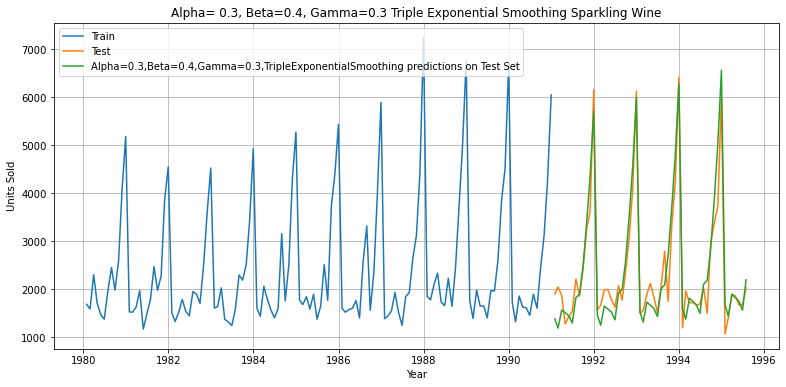

In [117]:
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.title("Alpha= 0.3, Beta=0.4, Gamma=0.3 Triple Exponential Smoothing Sparkling Wine")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(loc='best')
plt.grid();

In [118]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]},index=['Alpha=0.3,Beta=0.4,Gamma=0.3,Triple ExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
round(resultsDf,2)

Test RMSE
RegressionOnTime                                      1275.87
Naïve's Model                                         3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.098,SimpleExponentialSmoothing                1316.04
Alpha=0.3,SimpleExponentialSmoothing                  1935.51
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing         5908.19
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...     469.77
Alpha=0.3,Beta=0.4,Gamma=0.3,Triple Exponential...     392.79

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Test for stationarity of the series - Dicky Fuller test

In [119]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std() #determining the rolling standard deviation
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation For Sparkling Wine Production')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput,'\n')

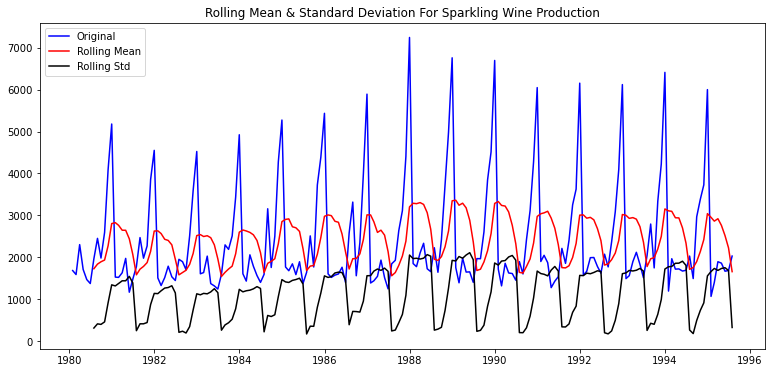

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
dtype: float64 

Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
dtype: float64 

Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [120]:
test_stationarity(ds['Sparkling'])

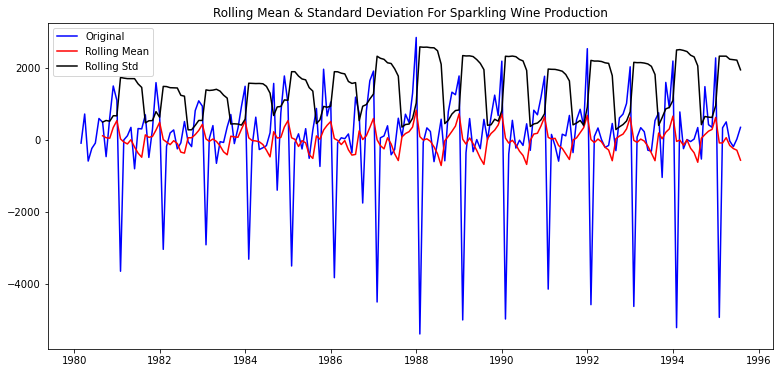

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
dtype: float64 

Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
dtype: float64 

Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [121]:
test_stationarity(ds['Sparkling'].diff().dropna())

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

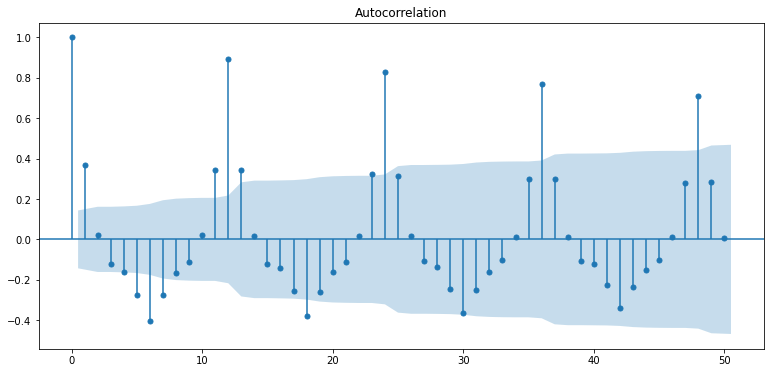

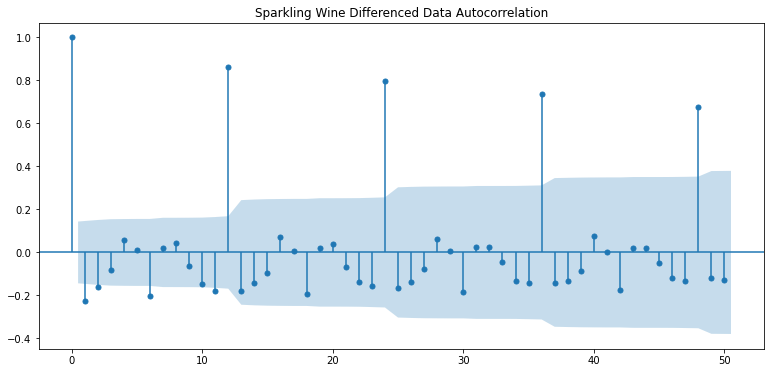

In [123]:
plot_acf(ds['Sparkling'],lags=50)
plot_acf(ds['Sparkling'].diff().dropna(),lags=50,title='Sparkling Wine Differenced Data Autocorrelation')
plt.show()

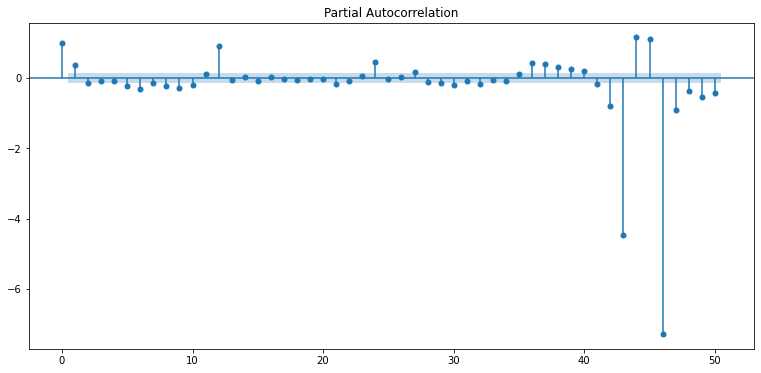

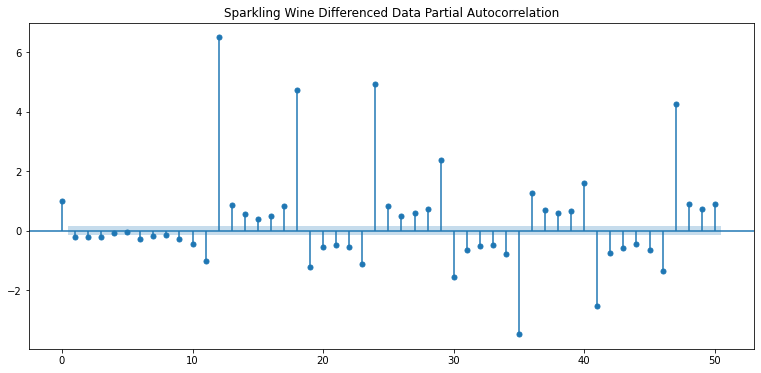

In [124]:
plot_pacf(ds['Sparkling'],lags=50)
plot_pacf(ds['Sparkling'].diff().dropna(),lags=50,title='Sparkling Wine Differenced Data Partial Autocorrelation')
plt.show()

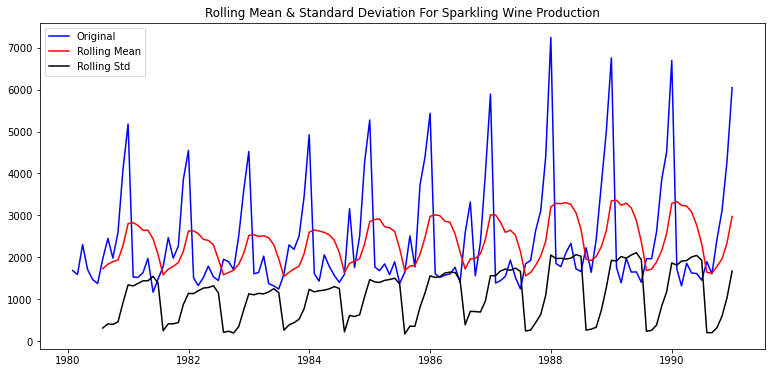

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
dtype: float64 

Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
dtype: float64 

Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [125]:
test_stationarity(train['Sparkling'])

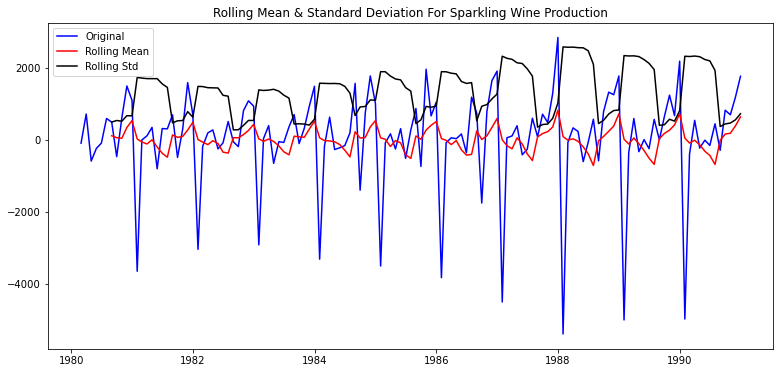

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
dtype: float64 

Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
dtype: float64 

Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [126]:
test_stationarity(train['Sparkling'].diff().dropna())

### Automated ARIMA Model

In [127]:
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


### Creating an empty Dataframe with column names only

In [128]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [129]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577
ARIMA(0, 1, 2) - AIC:2232.78309768405
ARIMA(1, 1, 0) - AIC:2268.5280607650034
ARIMA(1, 1, 1) - AIC:2235.0139453511238
ARIMA(1, 1, 2) - AIC:2233.59764711907
ARIMA(2, 1, 0) - AIC:2262.035600155025
ARIMA(2, 1, 1) - AIC:2232.360489884417
ARIMA(2, 1, 2) - AIC:2210.618562220438


### Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

In [130]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.618562
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906439
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [131]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.730
Date:                Tue, 12 Jul 2022   AIC                           2210.619
Time:                        23:26:40   BIC                           2227.870
Sample:                    02-29-1980   HQIC                          2217.628
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5843      0.518     10.790      0.000       4.570       6.599
ar.L1.D.Sparkling     1.2700      0.074     17.048      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [132]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [133]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.546023727508


In [134]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]},index=['ARIMA(2,1,2)'])
round(resultsDf_9,3)

Test RMSE
ARIMA(2,1,2)   1374.546

In [135]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]},index=['ARIMA(2,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
round(resultsDf,2)

Test RMSE
RegressionOnTime                                      1275.87
Naïve's Model                                         3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.098,SimpleExponentialSmoothing                1316.04
Alpha=0.3,SimpleExponentialSmoothing                  1935.51
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing         5908.19
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...     469.77
Alpha=0.3,Beta=0.4,Gamma=0.3,Triple Exponential...     392.79
ARIMA(2,1,2)                                          1374.55

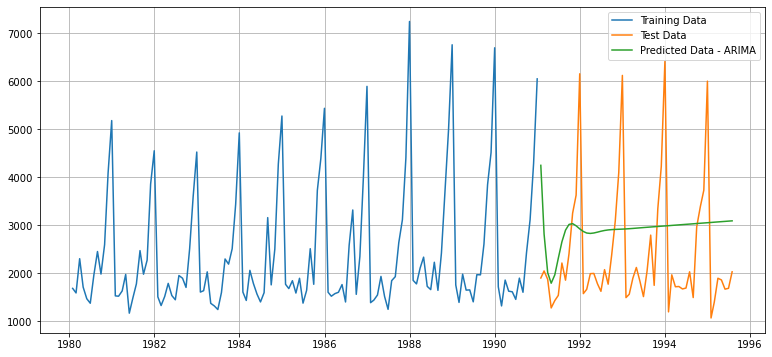

In [136]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

### Automated SARIMA Model

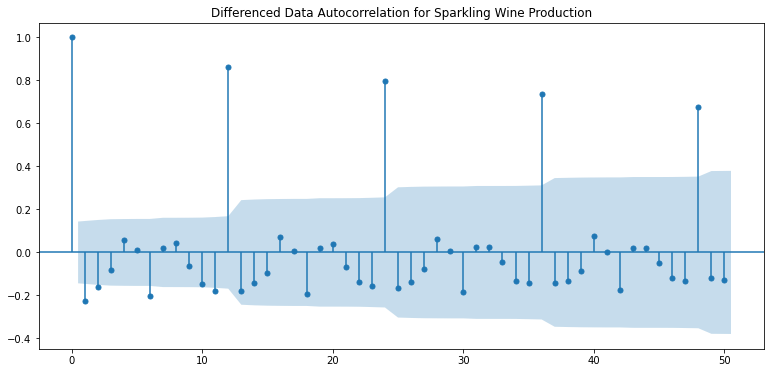

In [137]:
plot_acf(ds['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation for Sparkling Wine Production')
plt.show()

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model

#### We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [138]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [139]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [140]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536885285
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844427693
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123815902
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510798
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565727
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082825
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339541468
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298135562
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274257234
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103818865
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933228848
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.7036718705149
SARIMA(0, 1, 2)x(0, 0, 0, 6) - 

In [141]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [142]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,order=(0, 1, 2),seasonal_order=(2, 0, 2, 6),enforce_stationarity=False,enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Tue, 12 Jul 2022   AIC                           1727.889
Time:                                   23:27:55   BIC                           1747.164
Sample:                                        0   HQIC                          1735.713
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7851      0.103     -7.655      0.000      -0.986      -0.584
ma.L2         -0.0976      0.112     -0.871

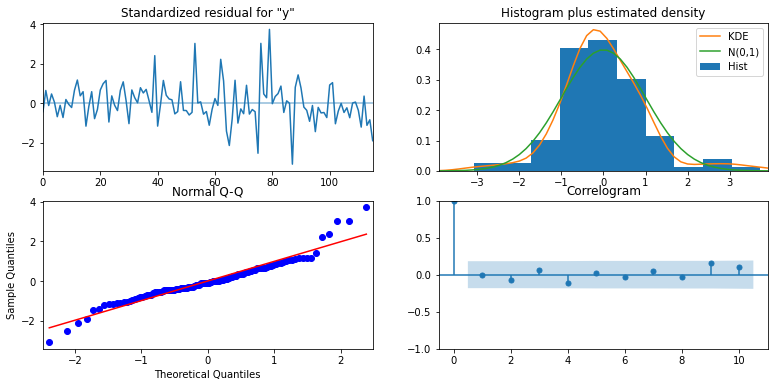

In [143]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [144]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [145]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1375.723266  384.067675     622.964456    2128.482077
1  1116.867397  392.833844     346.927212    1886.807582
2  1667.668042  395.405759     892.686995    2442.649089
3  1528.423107  397.964142     748.427721    2308.418492
4  1372.367185  400.506237     587.389385    2157.344984

In [146]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

601.1228569097198


In [147]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]},index=['SARIMA(0,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
round(resultsDf,2)

Test RMSE
RegressionOnTime                                      1275.87
Naïve's Model                                         3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.098,SimpleExponentialSmoothing                1316.04
Alpha=0.3,SimpleExponentialSmoothing                  1935.51
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing         5908.19
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...     469.77
Alpha=0.3,Beta=0.4,Gamma=0.3,Triple Exponential...     392.79
ARIMA(2,1,2)                                          1374.55
SARIMA(0,1,2)(2,0,2,6)                                 601.12

### Setting the seasonality as 12 for the iteration of the auto SARIMA model

In [148]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [149]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [150]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846013
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023565
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388796
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873579224
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610893
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920795
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566526
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957279854
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838495
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377595
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.150914496558
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177198
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085400543
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018863517897
SARIMA(0, 1, 2)

In [151]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121584
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340403

In [152]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,order=(1, 1, 2),seasonal_order=(1, 0, 2, 12),enforce_stationarity=False,enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Tue, 12 Jul 2022   AIC                           1555.584
Time:                                    23:29:21   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

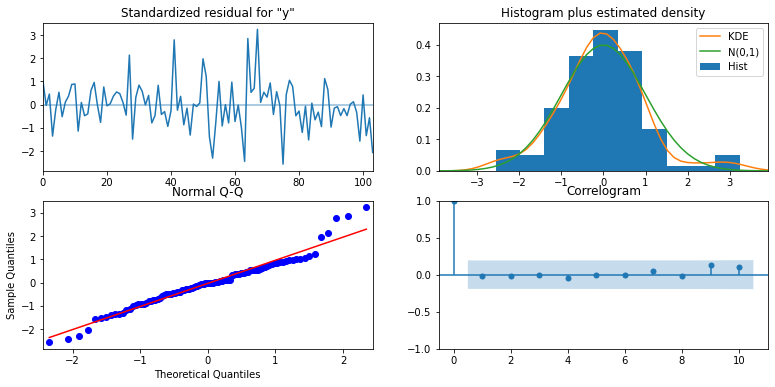

In [153]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [154]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [155]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.397751  388.342695     566.260054    2088.535448
1  1315.126244  402.007271     527.206471    2103.046017
2  1621.613165  402.000869     833.705940    2409.520389
3  1598.878659  407.238428     800.706007    2397.051312
4  1392.706939  407.968694     593.102993    2192.310886

In [156]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5924497908835


In [157]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]},index=['SARIMA(1,1,2)(1,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
round(resultsDf,2)

Test RMSE
RegressionOnTime                                      1275.87
Naïve's Model                                         3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.098,SimpleExponentialSmoothing                1316.04
Alpha=0.3,SimpleExponentialSmoothing                  1935.51
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing         5908.19
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...     469.77
Alpha=0.3,Beta=0.4,Gamma=0.3,Triple Exponential...     392.79
ARIMA(2,1,2)                                          1374.55
SARIMA(0,1,2)(2,0,2,6)                                 601.12
SARIMA(1,1,2)(1,0,2,12)                                528.59

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Manual ARIMA

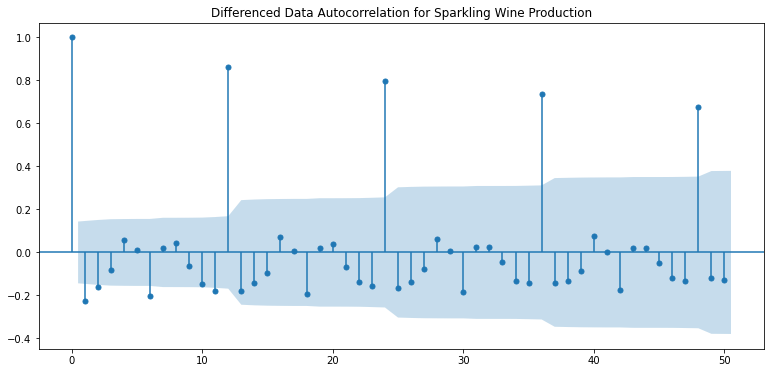

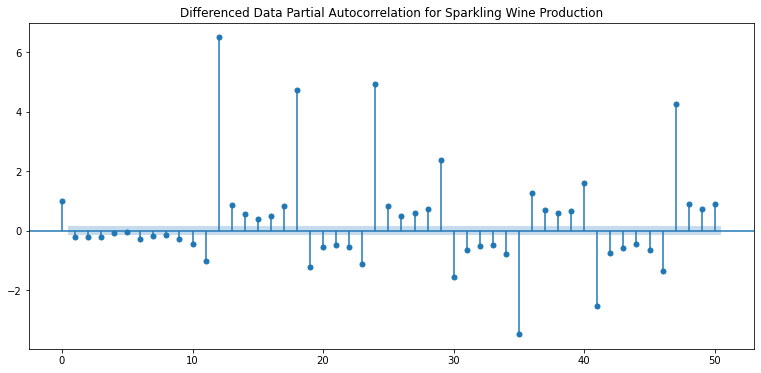

In [158]:
plot_acf(ds['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation for Sparkling Wine Production')
plot_pacf(ds['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation for Sparkling Wine Production')
plt.show()

In [159]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(1,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1111.799
Method:                       css-mle   S.D. of innovations           1155.290
Date:                Tue, 12 Jul 2022   AIC                           2233.598
Time:                        23:29:22   BIC                           2247.974
Sample:                    02-29-1980   HQIC                          2239.439
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.4580      4.211      1.534      0.125      -1.795      14.711
ar.L1.D.Sparkling     0.1896      0.166      1.143      0.253      -0.135       0.515
ma.L1.D.Sparkling    -0.

In [160]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [161]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1436.7259780684183


In [162]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]},index=['ARIMA(1,1,2)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
Naïve's Model                                       3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.098,SimpleExponentialSmoothing              1316.035487
Alpha=0.3,SimpleExponentialSmoothing                1935.507132
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing       5908.185554
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...   469.767970
Alpha=0.3,Beta=0.4,Gamma=0.3,Triple Exponential...   392.786198
ARIMA(2,1,2)                                        1374.546024
SARIMA(0,1,2)(2,0,2,6)                               601.122857
SARIMA(1,1,2)(1,0,2,12)                              528.592450
ARIMA(1,1,2)                                        1436.725978

### Manual SARIMA

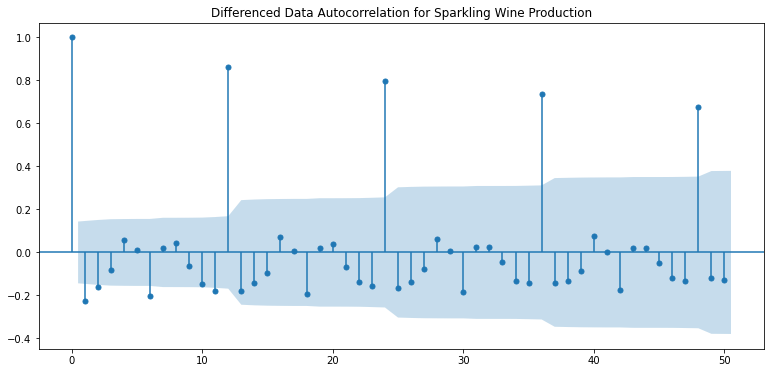

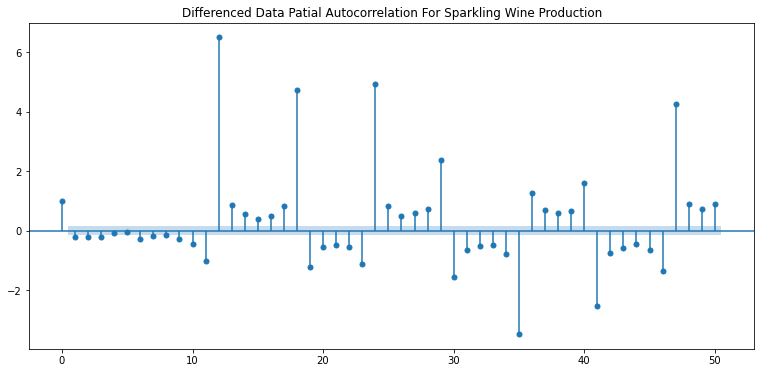

In [163]:
plot_acf(ds['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation for Sparkling Wine Production')
plot_pacf(ds['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation For Sparkling Wine Production')
plt.show()

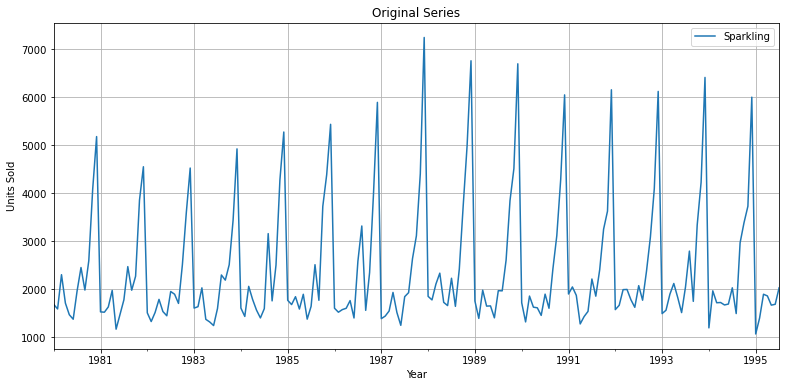

In [164]:
ds.plot()
plt.title("Original Series")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.grid();

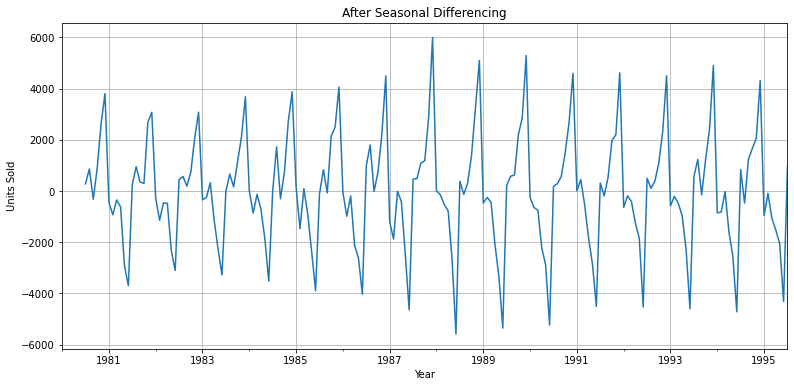

In [165]:
(ds['Sparkling'].diff(6)).plot()
plt.title("After Seasonal Differencing")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.grid();

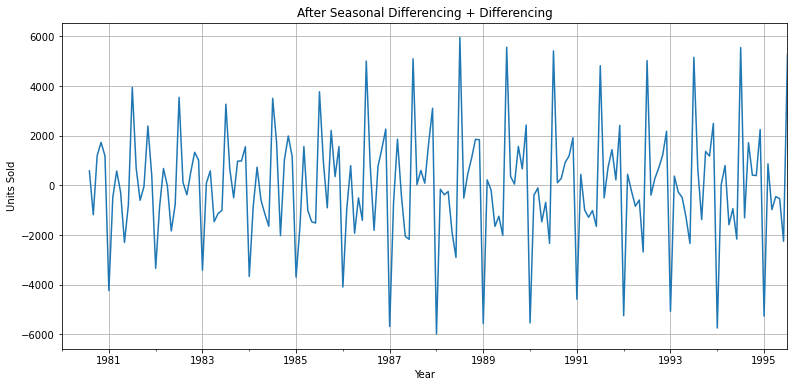

In [166]:
(ds['Sparkling'].diff(6)).diff().plot()
plt.title("After Seasonal Differencing + Differencing")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.grid();

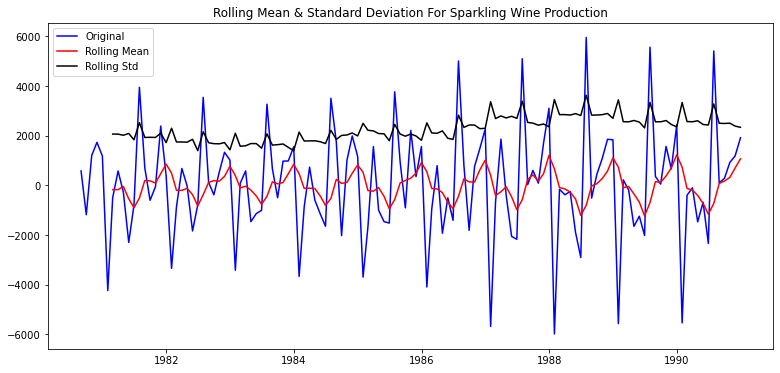

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
dtype: float64 

Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
dtype: float64 

Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [167]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

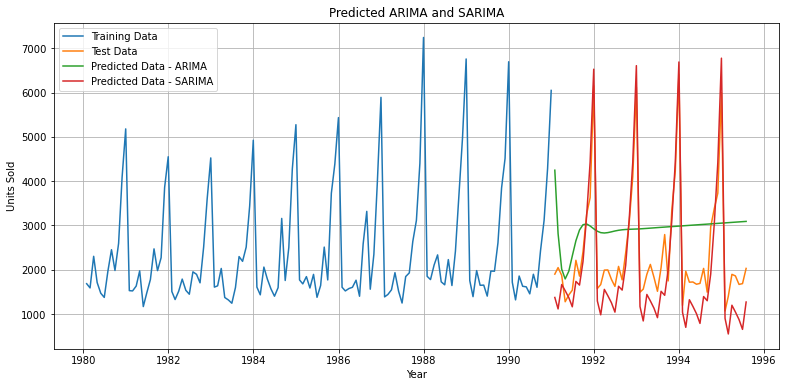

In [168]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,predicted_auto_SARIMA_6.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.title("Predicted ARIMA and SARIMA")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.grid();

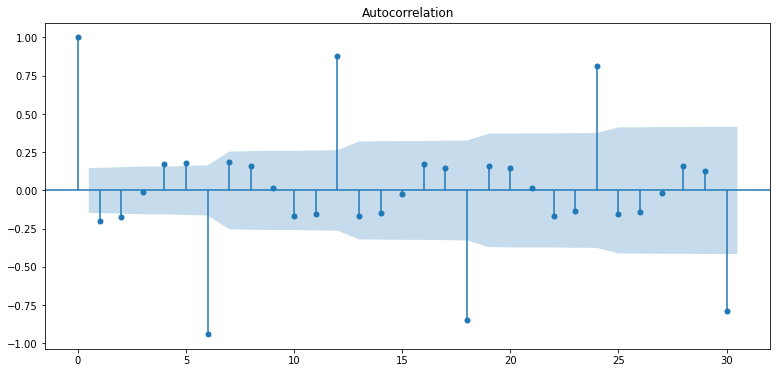

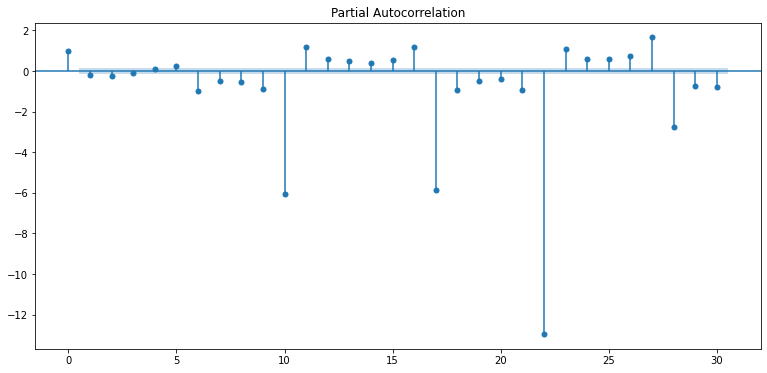

In [169]:
plot_acf((ds['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((ds['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [170]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,order=(1, 1, 2),seasonal_order=(1, 1, 2, 6),enforce_stationarity=False,enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -823.482
Date:                           Tue, 12 Jul 2022   AIC                           1660.963
Time:                                   23:29:33   BIC                           1679.867
Sample:                                        0   HQIC                          1668.631
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3934      0.279     -1.408      0.159      -0.941       0.154
ma.L1         -0.4239      0.199     -2.126

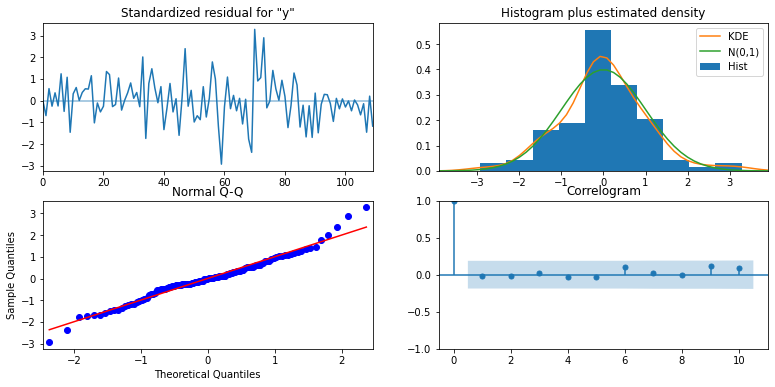

In [171]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [172]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [173]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1405.395511  430.546572     561.539737    2249.251285
1  1302.407245  456.658201     407.373617    2197.440872
2  1716.135193  456.659943     821.098151    2611.172235
3  1666.386355  460.469969     763.881799    2568.890911
4  1546.843177  461.825739     641.681361    2452.004992

In [174]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

557.1677834503904


In [175]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]},index=['SARIMA(1,1,2)(1,1,2,6)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
round(resultsDf,2)

Test RMSE
RegressionOnTime                                      1275.87
Naïve's Model                                         3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.098,SimpleExponentialSmoothing                1316.04
Alpha=0.3,SimpleExponentialSmoothing                  1935.51
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing         5908.19
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...     469.77
Alpha=0.3,Beta=0.4,Gamma=0.3,Triple Exponential...     392.79
ARIMA(2,1,2)                                          1374.55
SARIMA(0,1,2)(2,0,2,6)                                 601.12
SARIMA(1,1,2)(1,0,2,12)                                528.59
ARIMA(1,1,2)                                          1436.73
SARIMA(1,1,2)(1,1,2,6)                                 557.17

In [176]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,order=(1, 1, 2),seasonal_order=(1, 1, 2, 12),enforce_stationarity=False,enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -685.069
Date:                            Tue, 12 Jul 2022   AIC                           1384.138
Time:                                    23:29:35   BIC                           1401.790
Sample:                                         0   HQIC                          1391.263
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5751      0.285     -2.017      0.044      -1.134      -0.016
ma.L1         -0.1375      0.238   

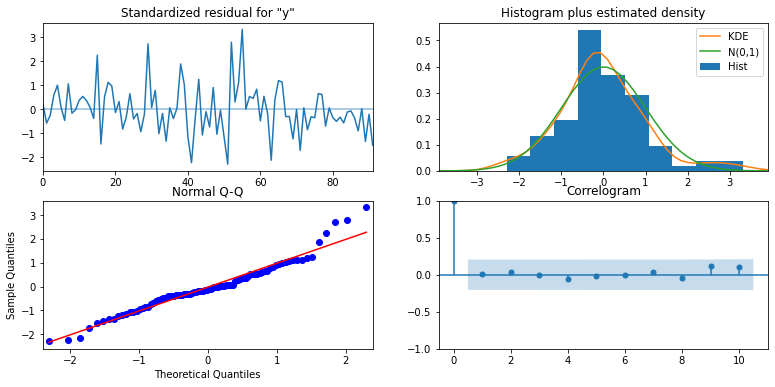

In [177]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [178]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [179]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1448.252060  413.055705     638.677755    2257.826365
1  1382.599982  429.778722     540.249165    2224.950798
2  1726.005672  430.040310     883.142152    2568.869191
3  1642.443285  434.472984     790.891884    2493.994687
4  1505.421768  434.832437     653.165852    2357.677684

In [180]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

401.51603276155913


In [181]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]},index=['SARIMA(1,1,2)(1,1,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
round(resultsDf,2)

Test RMSE
RegressionOnTime                                      1275.87
Naïve's Model                                         3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.098,SimpleExponentialSmoothing                1316.04
Alpha=0.3,SimpleExponentialSmoothing                  1935.51
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing         5908.19
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...     469.77
Alpha=0.3,Beta=0.4,Gamma=0.3,Triple Exponential...     392.79
ARIMA(2,1,2)                                          1374.55
SARIMA(0,1,2)(2,0,2,6)                                 601.12
SARIMA(1,1,2)(1,0,2,12)                                528.59
ARIMA(1,1,2)                                          1436.73
SARIMA(1,1,2)(1,1,2,6)                                 557.17
SARIMA(1,1,2)(1,1,2,12)                                401.52

# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [182]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]},index=['SARIMA(1,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
Naïve's Model                                       3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.098,SimpleExponentialSmoothing              1316.035487
Alpha=0.3,SimpleExponentialSmoothing                1935.507132
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing       5908.185554
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...   469.767970
Alpha=0.3,Beta=0.4,Gamma=0.3,Triple Exponential...   392.786198
ARIMA(2,1,2)                                        1374.546024
SARIMA(0,1,2)(2,0,2,6)                               601.122857
SARIMA(1,1,2)(1,0,2,12)                              528.592450
ARIMA(1,1,2)                                        1436.725978
SARIMA(1,1,2)(1,1,2,6)                               557.167783
SARIMA(1,1,2)(1,1,2,12)                              401.516033
SARIMA(1,1,2)(2,0,2,6)                               401.516033

In [183]:
print('Sorted by RMSE values on the Test Data for Sparkling Wine sale:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data for Sparkling Wine sale: 



Test RMSE
Alpha=0.3,Beta=0.4,Gamma=0.3,Triple Exponential...   392.786198
SARIMA(1,1,2)(2,0,2,6)                               401.516033
SARIMA(1,1,2)(1,1,2,12)                              401.516033
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...   469.767970
SARIMA(1,1,2)(1,0,2,12)                              528.592450
SARIMA(1,1,2)(1,1,2,6)                               557.167783
SARIMA(0,1,2)(2,0,2,6)                               601.122857
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
RegressionOnTime                                    1275.867052
6pointTrailingMovingAverage                         1283.927428
Alpha=0.098,SimpleExponentialSmoothing              1316.035487
9pointTrailingMovingAverage                         1346.278315
ARIMA(2,1,2)                                        1374.546024
ARIMA(1,1,2)                                        1436.725978
Alpha=0.3,SimpleExponentialSmoothing                1935.507132
Naïve's Model                                       3864.279352
Alpha=0.3,Beta=0.1,DoubleExponentialSmoothing       5908.185554

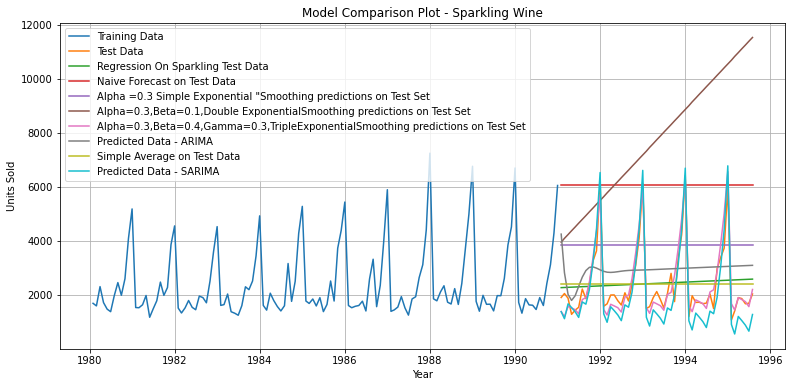

In [184]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(LinearRegression_test['RegOnTime'],label='Regression On Sparkling Test Data')
plt.plot(NaiveModel_test['naive'],label='Naive Forecast on Test Data')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential "Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.3, 0.1], label='Alpha=0.3,Beta=0.1,Double ExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(SimpleAverage_test['mean_forecast'],label='Simple Average on Test Data')
plt.plot(test.index,predicted_auto_SARIMA_6.predicted_mean,label='Predicted Data - SARIMA')
plt.title('Model Comparison Plot - Sparkling Wine')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(loc='best')
plt.grid();

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Building the most optimum model on the Full Data

### Plotting on both the Training and Test data

Text(0, 0.5, 'Units Sold')

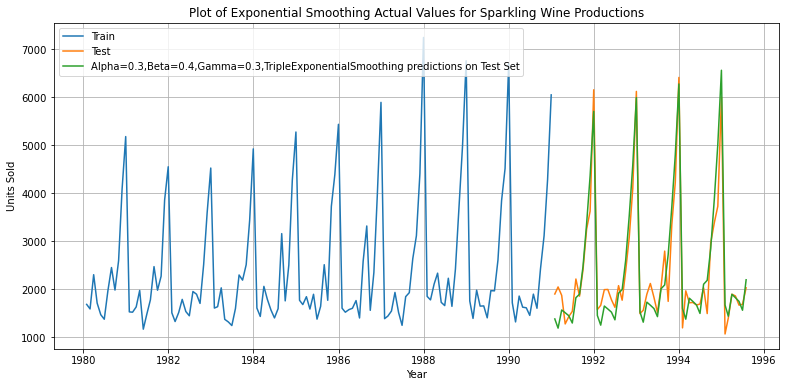

In [185]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Actual Values for Sparkling Wine Productions');
plt.xlabel('Year')
plt.ylabel('Units Sold')

In [186]:
fullmodel = ExponentialSmoothing(ds,trend='additive',seasonal='multiplicative').fit(smoothing_level=0.3,smoothing_slope=0.4,smoothing_seasonal=0.3)

In [187]:
print(fullmodel.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Sparkling   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                       39011653.936
Optimized:                         True   AIC                           2322.425
Trend:                         Additive   BIC                           2374.123
Seasonal:                Multiplicative   AICC                          2326.496
Seasonal Periods:                    12   Date:                 Tue, 12 Jul 2022
Box-Cox:                          False   Time:                         23:29:36
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3000000                alpha                False
smoothing_trend          

In [188]:
RMSE_fullmodel = metrics.mean_squared_error(ds['Sparkling'],fullmodel.fittedvalues,squared=False)
print('RMSE:',RMSE_fullmodel)

RMSE: 456.7477096237354


### Getting the predictions for the same number of times stamps that are present in the test data

In [189]:
prediction=fullmodel.forecast(steps=12)

Text(0, 0.5, 'Units Sold')

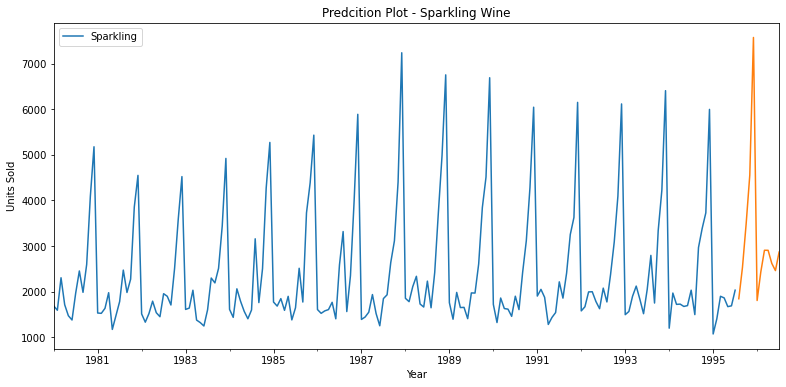

In [190]:
ds.plot()
prediction.plot();
plt.title('Predcition Plot - Sparkling Wine')
plt.xlabel('Year')
plt.ylabel('Units Sold')

In [191]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(fullmodel.resid,ddof=1),'prediction':prediction,'upper_ci': prediction + 1.96*np.std(fullmodel.resid,ddof=1)})
pred_df.head()

lower_CI   prediction     upper_ci
1995-08-31   945.725166  1843.290344  2740.855522
1995-09-30  1633.594038  2531.159216  3428.724394
1995-10-31  2583.221386  3480.786564  4378.351742
1995-11-30  3660.649862  4558.215040  5455.780218
1995-12-31  6680.176744  7577.741922  8475.307100

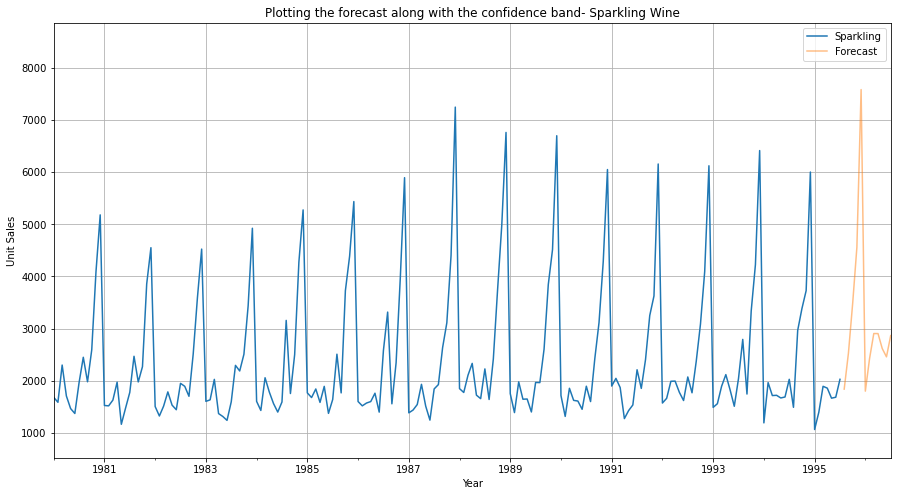

In [192]:
axis=ds.plot(label='Actual',figsize=(15,8))
pred_df['prediction'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_ci'],color='k',alpha=0)
plt.title('Plotting the forecast along with the confidence band- Sparkling Wine')
axis.set_xlabel('Year')
axis.set_ylabel('Unit Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [193]:
full_data_model = sm.tsa.statespace.SARIMAX(ds['Sparkling'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood               -1258.196
Date:                           Tue, 12 Jul 2022   AIC                           2530.392
Time:                                   23:29:38   BIC                           2552.383
Sample:                               01-31-1980   HQIC                          2539.315
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9474      0.106     -8.974      0.000      -1.154      -0.740
ma.L2         -0.1251      0.086     -1.447

In [194]:
full_data_model = sm.tsa.statespace.SARIMAX(ds['Sparkling'],
                                order=(1,1,2), 
                                seasonal_order=(1,0,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Tue, 12 Jul 2022   AIC                           2360.827
Time:                                    23:29:40   BIC                           2382.309
Sample:                                01-31-1980   HQIC                          2369.551
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6609      0.242     -2.732      0.006      -1.135      -0.187
ma.L1         -0.2740      0.200   

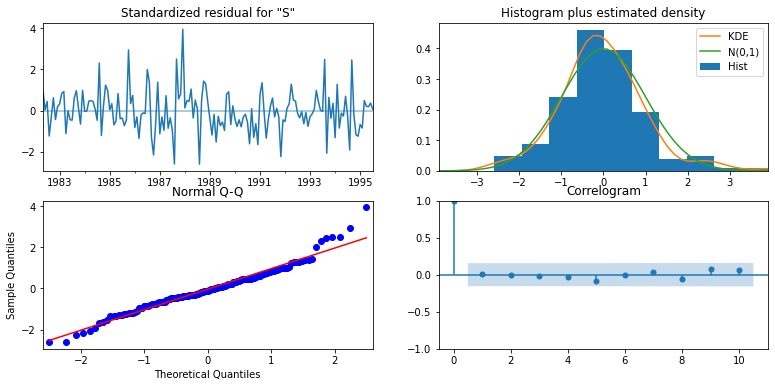

In [195]:
results_full_data_model.plot_diagnostics();

In [196]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [197]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1836.340846  379.713051    1092.116941    2580.564750
1995-09-30  2489.630321  384.476788    1736.069664    3243.190979
1995-10-31  3324.598524  384.582586    2570.830505    4078.366542
1995-11-30  4020.244235  386.339969    3263.031810    4777.456660
1995-12-31  6290.027372  386.394552    5532.707967    7047.346778

In [198]:
rmse = mean_squared_error(ds['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9774493103753


In [199]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

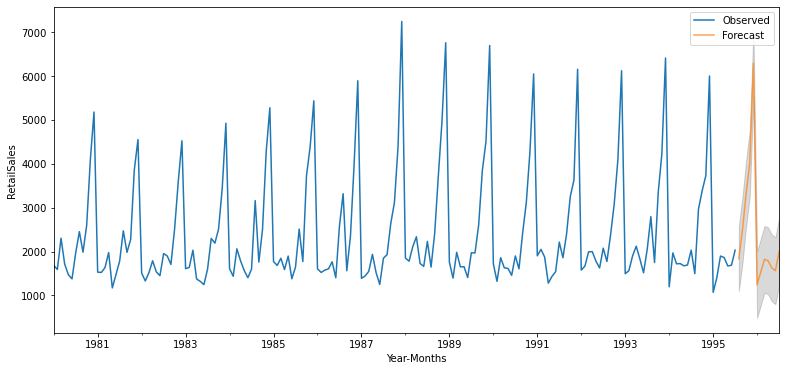

In [200]:
# plot the forecast along with the confidence band

axis = ds['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()